In [39]:
import pandas as pd
import numpy as np

from fbprophet import Prophet
import matplotlib.pyplot as plt

In [40]:
elec_df = pd.read_csv('../data/big_demand_temp_train_by_week.csv', index_col=0)
elec_df.rename({'week_demand' : 'y'}, axis=1, inplace=True)
elec_df.index = pd.DatetimeIndex(elec_df.index)
elec_df['ds'] = elec_df.index
elec_df.head()

,y,CA_pop,la_high,sd_high,sj_high,sf_high,sac_high,f_high,DOW,ds
2015-07-06,5731095.0,13845790.0,82.21,73.78,79.45,70.22,93.37,95.83,0.0,2015-07-06
2015-07-13,6067423.0,13845790.0,89.36,84.02,90.26,83.36,98.36,99.60,0.0,2015-07-13
2015-07-20,6233738.0,13845790.0,87.65,80.50,88.28,78.39,98.36,98.03,0.0,2015-07-20
2015-07-27,6473305.0,13845790.0,86.55,78.30,95.77,82.20,106.58,106.40,0.0,2015-07-27
2015-08-03,6166221.0,13845790.0,91.70,81.52,83.53,70.89,95.65,95.56,0.0,2015-08-03


In [41]:
train_len = int(0.7 * elec_df.shape[0])
window_len = int(0.1 * elec_df.shape[0])

In [42]:
# Make the primary train/validation split
X_train = elec_df.iloc[:train_len, :]

# Make intermediate trail windows for walk forward validation
X_walk1 = elec_df.iloc[train_len:train_len+window_len, :]
X_walk2 = elec_df.iloc[train_len+window_len:train_len+2*window_len, :]
X_walk3 = elec_df.iloc[train_len+2*window_len:train_len+3*window_len, :]

In [43]:
m = Prophet(weekly_seasonality=True, yearly_seasonality=True)
m.add_regressor('la_high')
m.add_regressor('sd_high')
m.add_regressor('f_high')
m.add_regressor('sj_high')
m.add_regressor('sf_high')
m.add_regressor('sac_high')
m.add_regressor('CA_pop')
m.fit(X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
forecast = m.predict(X_walk1)
forecast.index = pd.DatetimeIndex(forecast['ds'])

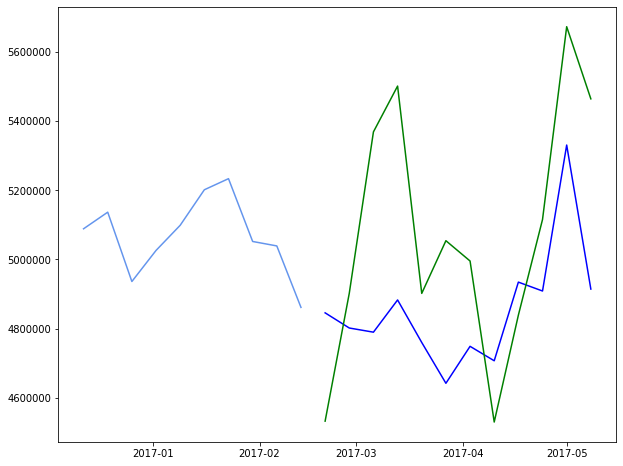

In [45]:
fig = plt.figure(figsize=[10,8])
plt.plot(X_walk1.index[:20], X_walk1['y'].values[:20], c='b', label='Test Data')
plt.plot(X_train.index[-10:], X_train['y'].values[-10:], c='cornflowerblue', label='Training Data')
plt.plot(forecast.index[:20], forecast['yhat'].values[:20], c='green', label='Forecast')

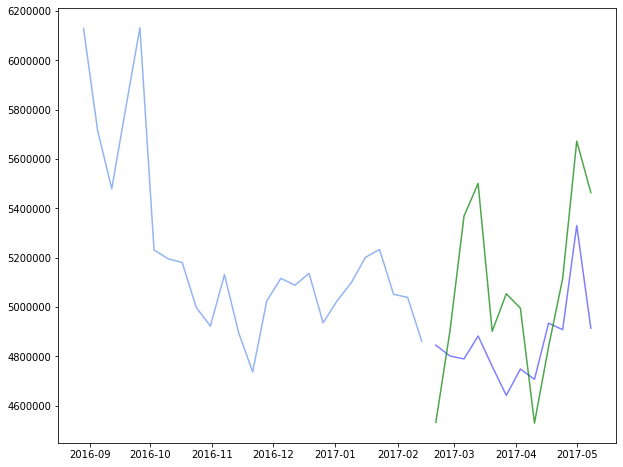

In [46]:
fig = plt.figure(figsize=[10,8])
plt.plot(X_walk1.index, X_walk1['y'].values, c='b', alpha=0.5)
plt.plot(X_train.index[-25:], X_train['y'].values[-25:], c='cornflowerblue', alpha=0.7)
plt.plot(forecast.index, forecast['yhat'].values, c='green', alpha=0.7)

In [47]:
residuals = [abs(X_walk1.loc[x, 'y'] - forecast.loc[x, 'yhat'])/ \
             X_walk1.loc[x, 'y'] * 100 for x in forecast.index]
timestamps = [int(x.timestamp()) for x in forecast.index]
z = np.polyfit(timestamps, residuals, 1)
poly_trend = np.poly1d(z)
trend = [poly_trend(x) for x in timestamps]

(0, 20)

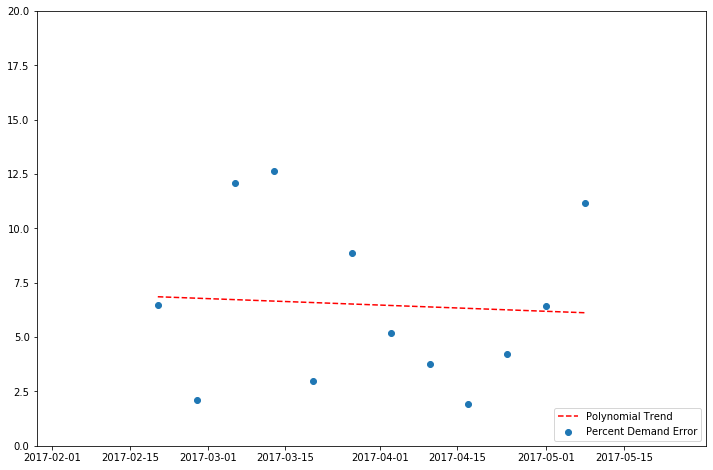

In [48]:
fig = plt.figure(figsize=[12,8])
plt.scatter(forecast.index, residuals, label='Percent Demand Error')
plt.plot(forecast.index, trend,"r--", label='Polynomial Trend')
plt.legend(loc='lower right')
plt.ylim(0, 20)

In [49]:
mape = np.mean(residuals[:3])
print(mape)

6.877233964340928


In [50]:
X_train = X_train.append(X_walk1)

In [51]:
m2 = Prophet(weekly_seasonality=True, yearly_seasonality=True)
m2.add_regressor('la_high')
m2.add_regressor('sd_high')
m2.add_regressor('f_high')
m2.add_regressor('sj_high')
m2.add_regressor('sf_high')
m2.add_regressor('sac_high')
m2.add_regressor('CA_pop')
m2.fit(X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
forecast2 = m.predict(X_walk2)
forecast2.index = pd.DatetimeIndex(forecast2['ds'])

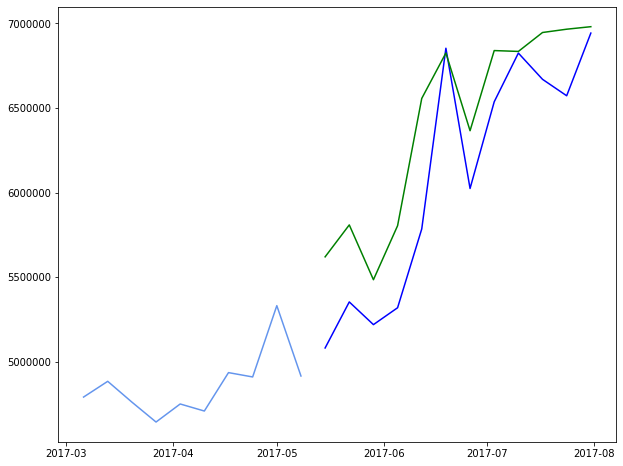

In [53]:
fig = plt.figure(figsize=[10,8])
plt.plot(X_walk2.index[:20], X_walk2['y'].values[:20], c='b', label='Test Data')
plt.plot(X_train.index[-10:], X_train['y'].values[-10:], c='cornflowerblue', label='Training Data')
plt.plot(forecast2.index[:20], forecast2['yhat'].values[:20], c='green', label='Forecast')

In [54]:
residuals = [abs(X_walk2.loc[x, 'y'] - forecast2.loc[x, 'yhat'])/ \
             X_walk2.loc[x, 'y'] * 100 for x in forecast2.index]
timestamps = [int(x.timestamp()) for x in forecast.index]
z = np.polyfit(timestamps, residuals, 1)
poly_trend = np.poly1d(z)
trend = [poly_trend(x) for x in timestamps]

(0, 20)

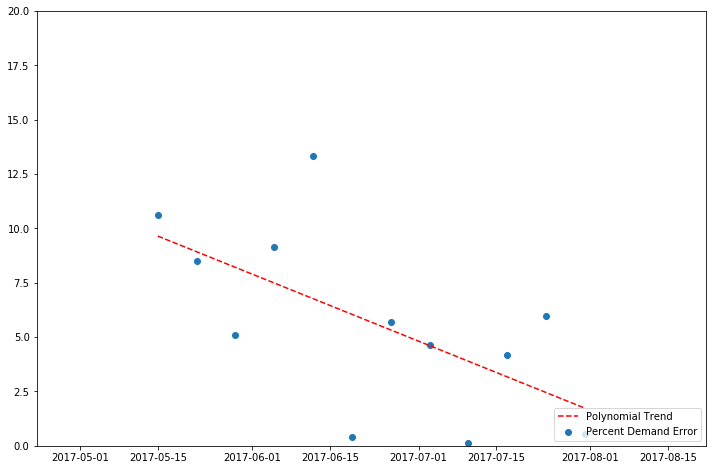

In [55]:
fig = plt.figure(figsize=[12,8])
plt.scatter(forecast2.index, residuals, label='Percent Demand Error')
plt.plot(forecast2.index, trend,"r--", label='Polynomial Trend')
plt.legend(loc='lower right')
plt.ylim(0, 20)

In [56]:
mape = np.mean(residuals[:4])
print(mape)

8.335502941845368


In [57]:
X_train = X_train.append(X_walk2)

In [58]:
m3 = Prophet(weekly_seasonality=True, yearly_seasonality=True)
m3.add_regressor('la_high')
m3.add_regressor('sd_high')
m3.add_regressor('f_high')
m3.add_regressor('sj_high')
m3.add_regressor('sf_high')
m3.add_regressor('sac_high')
m3.add_regressor('CA_pop')
m3.fit(X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
forecast3 = m.predict(X_walk3)
forecast3.index = pd.DatetimeIndex(forecast3['ds'])

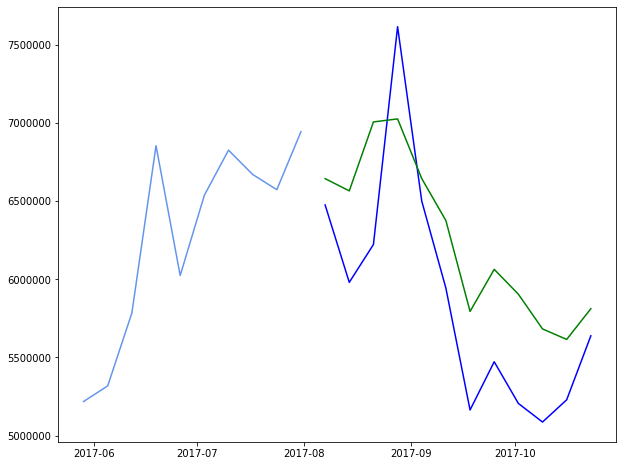

In [60]:
fig = plt.figure(figsize=[10,8])
plt.plot(X_walk3.index, X_walk3['y'].values, c='b', label='Test Data')
plt.plot(X_train.index[-10:], X_train['y'].values[-10:], c='cornflowerblue', label='Training Data')
plt.plot(forecast3.index, forecast3['yhat'].values, c='green', label='Forecast')

In [63]:
residuals = [abs(X_walk3.loc[x, 'y'] - forecast3.loc[x, 'yhat'])/ \
             X_walk3.loc[x, 'y'] * 100 for x in forecast3.index]
timestamps = [int(x.timestamp()) for x in forecast.index]
z = np.polyfit(timestamps, residuals, 1)
poly_trend = np.poly1d(z)
trend = [poly_trend(x) for x in timestamps]

(0, 20)

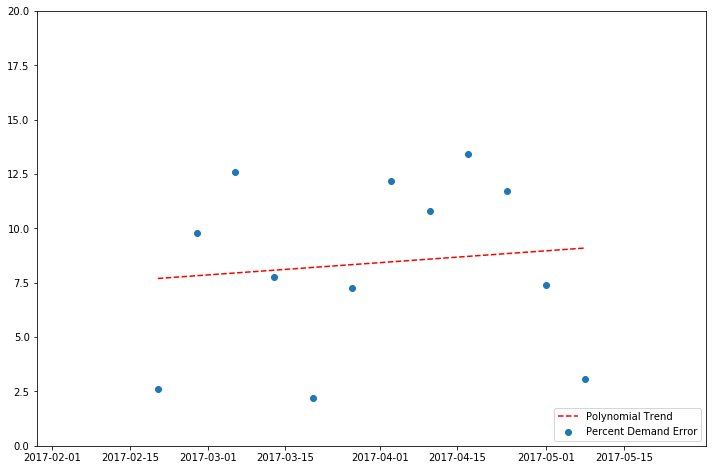

In [64]:
fig = plt.figure(figsize=[12,8])
plt.scatter(forecast.index, residuals, label='Percent Demand Error')
plt.plot(forecast.index, trend,"r--", label='Polynomial Trend')
plt.legend(loc='lower right')
plt.ylim(0, 20)

In [66]:
mape = np.mean(residuals[:3])
print(mape)

8.32221548509215


(array([3., 1., 1., 1., 2., 0., 1., 0., 1., 2.]),
 array([ 1.93497568,  3.0071441 ,  4.07931252,  5.15148094,  6.22364936,
         7.29581778,  8.3679862 ,  9.44015462, 10.51232304, 11.58449146,
        12.65665988]),
 <a list of 10 Patch objects>)

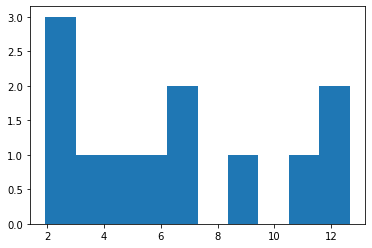

In [38]:
plt.hist(residuals)

### print(forecast.loc[forecast.index[0], 'yhat'], 
    forecast.loc[forecast.index[0], 'trend']+forecast.loc[forecast.index[0], 'daily']+\
    forecast.loc[forecast.index[0], 'weekly']+\
    forecast.loc[forecast.index[0], 'extra_regressors_additive'] + 
      forecast.loc[forecast.index[0], 'yearly'])

In [231]:
print(forecast.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Fresno', 'Fresno_lower', 'Fresno_upper', 'Fri', 'Fri_lower',
       'Fri_upper', 'Los Angeles', 'Los Angeles_lower', 'Los Angeles_upper',
       'Mon', 'Mon_lower', 'Mon_upper', 'San Diego', 'San Diego_lower',
       'San Diego_upper', 'Sat', 'Sat_lower', 'Sat_upper', 'Thur',
       'Thur_lower', 'Thur_upper', 'Tue', 'Tue_lower', 'Tue_upper', 'Wed',
       'Wed_lower', 'Wed_upper', 'additive_terms', 'additive_terms_lower',
       'additive_terms_upper', 'daily', 'daily_lower', 'daily_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')
